In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Loading Dataset
data=pd.read_csv("C:/Users/patel/Desktop/sample data/World-happiness-report-2024.csv")
print(data)

         Country name            Regional indicator  Ladder score  \
0             Finland                Western Europe         7.741   
1             Denmark                Western Europe         7.583   
2             Iceland                Western Europe         7.525   
3              Sweden                Western Europe         7.344   
4              Israel  Middle East and North Africa         7.341   
..                ...                           ...           ...   
138  Congo (Kinshasa)            Sub-Saharan Africa         3.295   
139      Sierra Leone            Sub-Saharan Africa         3.245   
140           Lesotho            Sub-Saharan Africa         3.186   
141           Lebanon  Middle East and North Africa         2.707   
142       Afghanistan                    South Asia         1.721   

     upperwhisker  lowerwhisker  Log GDP per capita  Social support  \
0           7.815         7.667               1.844           1.572   
1           7.665         7.5

In [215]:
#Exploring the data
print(data.dtypes)
print(data.info())
print(data.describe())

Country name                     object
Regional indicator               object
Ladder score                    float64
upperwhisker                    float64
lowerwhisker                    float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null

In [216]:
#Reducing Column name
data=data.rename(columns={"Country name":"Country","Ladder score":"Happiness_score","Regional indicator":"Region",
                          "Perceptions of corruption":"Corruption","Freedom to make life choices":"Freedom",
                          "Healthy life expectancy":"healthy_life_exp","Log GDP per capita":"income_pc"})


In [217]:
#Data Cleaning
print(data.isnull().sum())#Null values Found
data=data.dropna()#Null values removed
print(data.isnull().sum())
print(data.duplicated().sum())#No Duplicate Values Found

Country                0
Region                 0
Happiness_score        0
upperwhisker           0
lowerwhisker           0
income_pc              3
Social support         3
healthy_life_exp       3
Freedom                3
Generosity             3
Corruption             3
Dystopia + residual    3
dtype: int64
Country                0
Region                 0
Happiness_score        0
upperwhisker           0
lowerwhisker           0
income_pc              0
Social support         0
healthy_life_exp       0
Freedom                0
Generosity             0
Corruption             0
Dystopia + residual    0
dtype: int64
0


In [218]:
print(data["Region"].unique())
print(data["Region"].value_counts())


['Western Europe' 'Middle East and North Africa' 'North America and ANZ'
 'Latin America and Caribbean' 'Central and Eastern Europe'
 'Southeast Asia' 'East Asia' 'Commonwealth of Independent States'
 'Sub-Saharan Africa' 'South Asia']
Region
Sub-Saharan Africa                    35
Western Europe                        20
Latin America and Caribbean           19
Central and Eastern Europe            17
Middle East and North Africa          15
Southeast Asia                         9
Commonwealth of Independent States     9
East Asia                              6
South Asia                             6
North America and ANZ                  4
Name: count, dtype: int64


These are the Top 10
       Country                        Region  Happiness_score
0      Finland                Western Europe            7.741
1      Denmark                Western Europe            7.583
2      Iceland                Western Europe            7.525
3       Sweden                Western Europe            7.344
4       Israel  Middle East and North Africa            7.341
5  Netherlands                Western Europe            7.319
6       Norway                Western Europe            7.302
7   Luxembourg                Western Europe            7.122
8  Switzerland                Western Europe            7.060
9    Australia         North America and ANZ            7.057


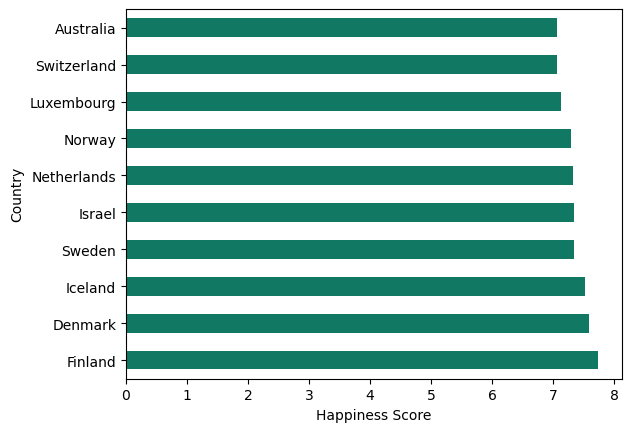

In [239]:
top10=data.nlargest(10,"Happiness_score")[["Country","Region","Happiness_score"]]
print("These are the Top 10")
print(top10)

top10.plot(kind="barh",y="Happiness_score",x="Country",legend=False,color="#117864" )
plt.xlabel("Happiness Score")
plt.savefig("top10",bbox_inches="tight")

These are the Bottom 10
              Country                        Region  Happiness_score
142       Afghanistan                    South Asia            1.721
141           Lebanon  Middle East and North Africa            2.707
140           Lesotho            Sub-Saharan Africa            3.186
139      Sierra Leone            Sub-Saharan Africa            3.245
138  Congo (Kinshasa)            Sub-Saharan Africa            3.295
137          Zimbabwe            Sub-Saharan Africa            3.341
136          Botswana            Sub-Saharan Africa            3.383
135            Malawi            Sub-Saharan Africa            3.421
133            Zambia            Sub-Saharan Africa            3.502
134          Eswatini            Sub-Saharan Africa            3.502


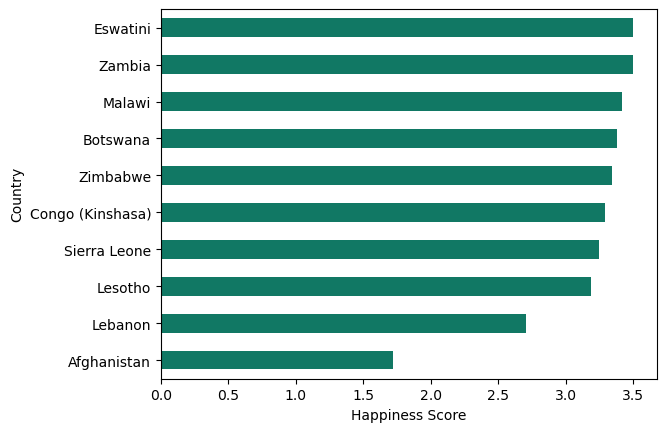

In [241]:
bottom10=data.nsmallest(10,"Happiness_score")[["Country","Region","Happiness_score"]]
print("These are the Bottom 10")
print(bottom10)
bottom10.plot(kind="barh",x="Country",y="Happiness_score",legend=False,color="#117864")
plt.xlabel("Happiness Score")
plt.savefig("bottom10",bbox_inches="tight")

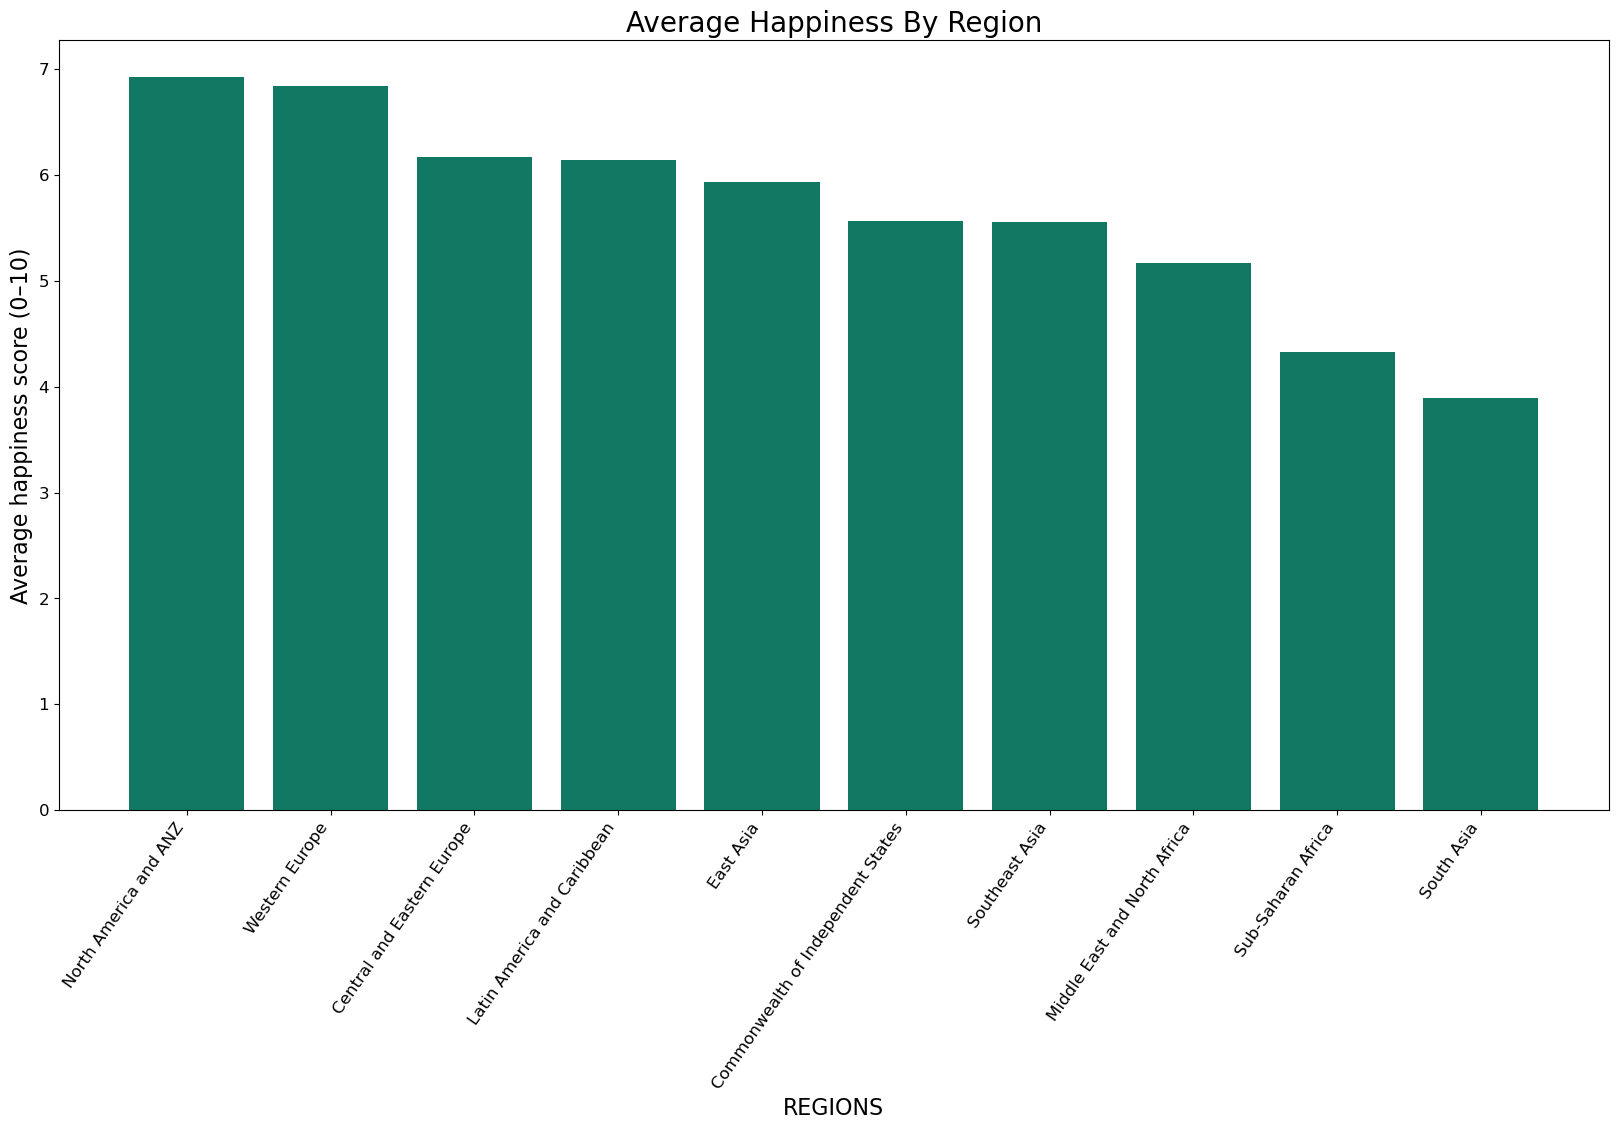

In [243]:
regional_avg=(data.groupby("Region")["Happiness_score"].mean().sort_values(ascending=False))
#print(regional_avg)
plt.figure(figsize=(20,10))
plt.bar(regional_avg.index,regional_avg.values,color="#117864")
plt.xlabel("REGIONS",fontsize=16)
plt.xticks(rotation=55, ha='right',fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Average happiness score (0–10)",fontsize=16)
plt.title("Average Happiness By Region",fontsize=20)
plt.savefig("avg",bbox_inches="tight")

In [222]:
numeric_data=data.select_dtypes(include="number")
correlation=numeric_data.corr()["Happiness_score"].sort_values(ascending=False)
print(correlation)

Happiness_score        1.000000
lowerwhisker           0.999718
upperwhisker           0.999700
Social support         0.813542
income_pc              0.768504
healthy_life_exp       0.759659
Freedom                0.644451
Dystopia + residual    0.533542
Corruption             0.451829
Generosity             0.130038
Name: Happiness_score, dtype: float64


Index(['Country', 'Region', 'Happiness_score', 'upperwhisker', 'lowerwhisker',
       'income_pc', 'Social support', 'healthy_life_exp', 'Freedom',
       'Generosity', 'Corruption', 'Dystopia + residual'],
      dtype='object')


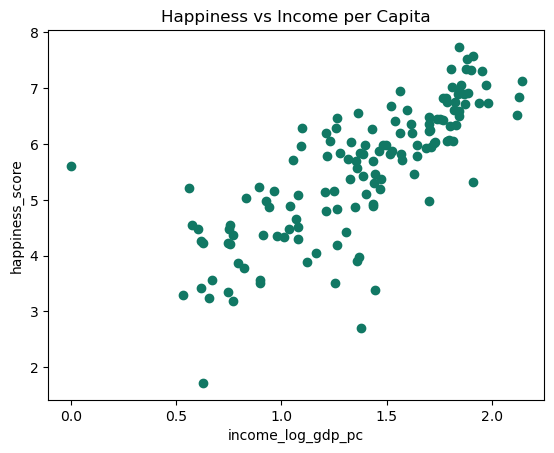

In [245]:
print(data.columns)
plt.scatter(data["income_pc"],data["Happiness_score"],color="#117864")
plt.title("Happiness vs Income per Capita")
plt.xlabel("income_log_gdp_pc")
plt.ylabel("happiness_score")
plt.savefig("Happinessvcincome",bbox_inches="tight")